<center>

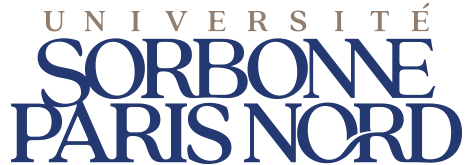

</center>

<h1><center><strong style="color: #293358">Nouveaux paradigmes de base de données<br/> BUT 3 - IUT Villetaneuse <br/> Dénormalisation et Redis (encore)</strong></center></h1>

<center>
<h3 style="color: #8b7d6d"><a href="https://gguibon.github.io/">Gaël Guibon</a></h3>
<email>gael.guibon@sorbonne-paris-nord.fr</email>
<p>#gael6674</p>
<br/>
Year 2025-2026

Original Content

Licenced under Affero GNU3
</center>

## <strong style="color: #8b7d6d">Usage de la machine virtuelle</strong>

1. Téléchargez la VM ici : https://e.pcloud.link/publink/show?code=XZ3dvxZh0fEzIaCmqF9HHRP346u0S0MY4lk
2. Importez la dans Virtual Box
3. Connectez-vous avec l'id `uspn`et le mot de passe `uspn`
4. Enjoy !


Cette machine virtuelle est déjà configurée pour Redis et il vous suffit de lancer les quelques commandes de la section suivante pour y installer MongoDB.

## <strong style="color: #8b7d6d">Installation de redis</strong>

### Windows / MacOS / Linux

1. Téléchargez Docker Desktop : https://www.docker.com/
2. Installez le en mettant tout par défaut
3. `docker run -d --name redis-stack -p 6379:6379 -p 8001:8001 redis/redis-stack:latest`

## <strong style="color: #8b7d6d">Lancement de redis (redis-stack)</strong>

### Ubuntu 24.04 LTS

In [ ]:
# verifier les conteneurs
! sudo docker ps -a

# lancer le conteneur redis
! sudo docker start redis-stack

### Windows 10 / 11

Lancez l'interface graphique de docker et activez le conteneur `redis-stack`.

## <strong style="color: #8b7d6d">Adaptation des pokémons pour Redis</strong>

La base de données de pokémons doit être intégrée à Redis. Cependant, cette base de données possède une hiérarchie, quelle horreur pour Redis ! 😱 C'est à ce moment que les modules de Redis interviennent, notamment... `RedisJSON`!

RedisJson est très pratique pour traiter des documents, un peu comme avec MongoDB, mais cette fois-ci directement en mémoire. Nous allons donc utiliser la base de données de pokémons avec ce module. Cela vous oblige à utiliser des méthodes d'instances de classes différentes.

💡Astuces :
- documentation de RedisJson dans redis-py (en python donc 😌) : https://redis.readthedocs.io/en/stable/redismodules.html#redisjson-commands
- site officiel de RedisJson, avec des commandes à utiliser dans `redis-cli`: https://redis.io/json/  (Attention, il s'agit donc d'un parallèle avec `mongosh`, `redis-cli` est une command line interface. Pour un usage plus optimal, utilisez le terminal intégré à redis insight (disponible sur http://localhost:8001/ si vous avez bien lancé redis stack)).

In [ ]:
import json, copy, redis
import pandas as pd

In [2]:
def magie(nom, element):
    return f"{nom} lance une magie de {element} !!"

gael = {
    "prenom": "Gaël",
    "force": 30000,
    "intelligence": 70000,
    "competences": {
        "magie": magie
    }
}

# print(gael["competences"])

gael["competences"]["magie"](gael["prenom"], "🧊")



'Gaël lance une magie de 🧊 !!'

#### 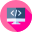 **TODO!**

Commencons par jouer avec quelques commandes utiles de RedisJson.

Créez un dictionnaire contenant votre prénom, nom, âge et vos fruits favoris (vive les litchis !). Insérez le dans une clé de Redis.

In [ ]:
r = redis.Redis(host='localhost', port=6379, decode_responses=True)

# code moi steupléé 🥺

#### 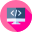 **TODO!**

Vérifiez son type dans Redis Insights. Que voyez-vous ?

In [ ]:
# code moi steupléé 🥺

#### 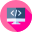 **TODO!**

Affichez ce dictionnaire à partir de redis.

In [ ]:
# code moi steupléé 🥺

#### 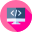 **TODO!**

Vérifiez son type dans Redis Insights puis récupérez le en python et affichez le avec son type.

Que constatez-vous ?

In [ ]:
# code moi steupléé 🥺

#### 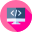 **TODO!**

Affichez les clés de ce dictionnaire à partir de redis (pour éviter de créer un doublon en mémoire 😉).

In [ ]:
# code moi steupléé 🥺

#### 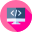 **TODO!**

Uniquement à l'aide de redis, affichez votre âge et son type.

Interdiction de récupérer tout le dictionnaire, puis d'y extraire l'âge. Faites le directement à partir des données dans Redis.

Astuces :
- regardez la documentation de la méthode `.get()` de RedisJson

In [ ]:
# code moi steupléé 🥺

#### 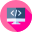 **TODO!**

Ajoutez dans ce JSON, le <a href="https://fr.wikipedia.org/wiki/Ramboutan">rambutan</a> à la liste des fruits.

In [ ]:
# code moi steupléé 🥺

#### 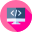 **TODO!**

Affichez uniquement la liste de fruits favoris, et ce, directement à partir de redis. Le délicieux ramboutan s'y trouve-t-il ?

In [ ]:
# code moi steupléé 🥺

#### 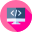 **TODO!**

Supprimez cette clé contenant le JSON avec vos informations.

In [ ]:
# code moi steupléé 🥺

#### 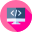 **TODO!**

Insérez toute la base de données des pokémons dans Redis. 

Vous devez donc faire en sorte de récupérer uniquement les éléments au fur et à mesure, donc, un pokémon à la fois. Puis vous le mettez dans Redis.

Attention 2 ! **Obligation d'adapter la représentation des données**. Notre fichier de données est une liste de dictionnaires. Trouvez un moyen d'améliorer sa représentation en exploitant la caractéristique clé-valeur de Redis. 
Plusieurs solutions sont possibles, mais gardez à l'esprit que nous souhaitons accélérer l'accès aux données.

In [ ]:
# code moi steupléé 🥺

#### 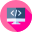 **TODO!**

Oui, le but était de vous forcer à considérer une autre représentation légère des données. En soi, vous pouvez très bien l'insérer d'une autre manière.

...faisons le.

Insérez toute la base de pokémons issue de MongoDB dans Redis. Cette fois-ci, en mettant toute la collection dans une clé `pokemons`.


In [ ]:
# code moi steupléé 🥺

#### 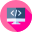 **TODO!**

Affichez le nombre de pokemons dans la clé `pokemons`.

In [ ]:
# code moi steupléé 🥺

#### 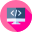 **TODO!**

Affichez le septième pokémon dans ce JSON, uniquement à partir de redis.

In [ ]:
# code moi steupléé 🥺

#### 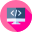 **TODO!**

Pour chaque pokémon, ajoutez un champ booléen permettant de le mettre en favori.

In [ ]:
# code moi steupléé 🥺

#### 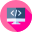 **TODO!**

Créez une fonction qui, à partir du nom d'un pokémon, le met en favori ou enlève le statut de favori de ce pokémon dans la base de données redis.

In [ ]:
# code moi steupléé 🥺

#### 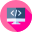 **TODO!**

Créez une fonction qui affiche la liste des noms des pokémons favoris.

In [ ]:
# code moi steupléé 🥺

Bon... tout cela ne semble pas très optimisé n'est-ce pas ? La recherche sous Redis doit passer par d'autres approches pour être efficace. C'est ce que nous verrons la prochaine, entre autres 😉